In [2]:
!ls

Makefile    checker.pl  output.txt  rice.png    src         toy_test
README.md   metis.ipynb partition   rice.txt    toy.sh


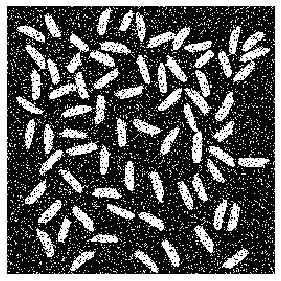

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import numpy as np


class Image:
    def __init__(self, file, type="png", width=None, height=None):
        if type == "png":
            self.img = mpimg.imread(file)
            self.height = len(self.img)
            self.width = len(self.img[0])
        else:
            assert(width != None)
            assert(height != None)
            self.height = height
            self.width = width
            self.img = np.zeros([height, width])
            with open(file) as f:
                lines = f.readlines()
            for line in lines:
                x, y, color = lines.split()
            self.img[x][y] = color

    
    def flatten(self):
        flat_img = np.zeros([self.height, self.width], dtype=int)
        for i in range(self.height):
            for j in range(self.width):
                if np.all(self.img[i][j])== 0:
                    flat_img[i][j] = 1
        self.img = flat_img
    
    def savetxt(self, txt_file):
        np.savetxt(txt_file, self.img, delimiter=" ", fmt='%d')
    
    def savepng(self, png_file):
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.margins(0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.savefig(png_file, bbox_inches='tight', pad_inches = 0)
        
    def add_bernouli_noise(self, p):
        for i in range(self.height):
            for j in range(self.width):
                r = np.random.random()
                if r < p:
                    self.img[i][j] = 1 - self.img[i][j]
    
    def show(self):
        # only work when img is not flattened
        self.img = plt.imshow(self.img)
                





In [62]:
# img.saveimg("rice.txt")
img = Image("rice.png")
img.add_bernouli_noise(0.1)
img.flatten()
img.savetxt("rice.txt")

In [ ]:
# img.saveimg("rice.txt")
img = Image("rice.png")
# img.flatten()
img.add_bernouli_noise(0.1)
img.show()
img.savepng("rice_noise_0.1.png")